<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Naive_Bayes_TA_session_Nov13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Naive Bayes Classifier**


Consider the data set as given below.

In [ ]:
#First, we import the required packages
import numpy as np
#for the following statement to compile successfully, you need the scikit-learn package.
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer() 
X = breast_cancer_data.data
y = breast_cancer_data.target
#check the shape of breast cancer data features
print("Breast cancer data shape:", np.shape(X))
#check the shape of breast cancer target labels
print("Breast cancer target shape:", np.shape(y))
print(np.unique(y)) #print the unique classes
print("No. of labels with label as 1:",sum(y))
#We can print first 3 samples of breast cancer data and check
print(X[0:3])

Breast cancer data shape: (569, 30)
Breast cancer target shape: (569,)
[0 1]
No. of labels with label as 1: 357
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-0

In [ ]:
np.random.seed(1000) #for reproducibility
num_samples = len(X)
#Create an index array 
indexarr = np.arange(num_samples) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [ ]:
#Use the samples corresponding to first 80% of indexarr for training 
num_train = int(0.8*num_samples)
#Use the remaining 20% samples for testing 
num_test = num_samples-num_train
print('num_train: ',num_train, ' num_test: ', num_test)

num_train:  455  num_test:  114


In [ ]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_X = X[indexarr[0:num_train]]
train_y = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_X.shape)
print('shape of train data labels')
print(train_y.shape)

shape of train data features:
(455, 30)
shape of train data labels
(455,)


In [ ]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_X = X[indexarr[num_train:num_samples]]
test_y = y[indexarr[num_train:num_samples]]
print('shape of test data features:')
print(test_X.shape)
print('shape of test data labels')
print(test_y.shape)

shape of test data features:
(114, 30)
shape of test data labels
(114,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() #define a model using Gaussian version Naive Bayes classifier
nb_model.fit(train_X, train_y) #fit the model using the training data

GaussianNB(priors=None, var_smoothing=1e-09)

**GaussianNB(priors, var_smoothing=1e-09)** command in *scikit-learn* package uses the following parameters:


*   *priors* as probabilities of the classes. (If specified the priors are not adjusted according to the data.)
*   *var_smoothing* is the portion of the largest variance of all features that is added to variances for calculation stability.


In [ ]:
predicted_train_y = nb_model.predict(train_X)
predicted_test_y = nb_model.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       161
           1       0.95      0.98      0.96       294

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

Test Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        51
           1       0.86      0.98      0.92        63

    accuracy                           0.90       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114



In [ ]:
import pandas as pd #the pandas library is useful for data processing
train_X_df = pd.DataFrame(train_X, columns = breast_cancer_data.feature_names)
test_X_df = pd.DataFrame(test_X, columns = breast_cancer_data.feature_names)

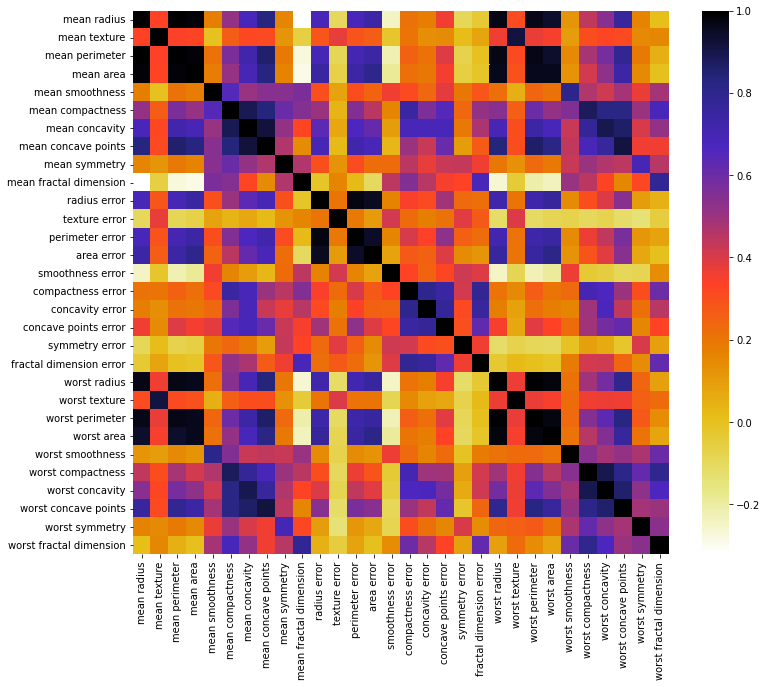

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_X_df.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.CMRmap_r)
plt.show()

**Correlation**:

Pearson correlation coefficient is a measure of linear correlation between two sets of data.

$$\rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}=\frac{\mathbb{E}[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}.$$

In [ ]:
#Dropping folowing features from the data
train_X_df.drop(['mean perimeter', 'mean area',  'mean smoothness', 'perimeter error', 'area error', 'compactness error', 'worst perimeter', 'worst area', 'worst concavity'], axis=1)

,mean radius,mean texture,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension
0,17.68,20.74,0.16650,0.18550,0.105400,0.1971,0.06166,0.8113,1.4000,0.009037,0.05206,0.018410,0.01778,0.004968,20.47,25.11,0.14180,0.34980,0.15150,0.2463,0.07738
1,18.65,17.60,0.16860,0.19740,0.100900,0.1907,0.06049,0.6289,0.6633,0.006294,0.05554,0.016950,0.02428,0.003535,22.82,21.32,0.16790,0.50900,0.23780,0.3799,0.09185
2,21.75,20.99,0.19610,0.21950,0.108800,0.1721,0.06194,1.1670,1.3520,0.005687,0.06329,0.015610,0.01924,0.004614,28.19,28.18,0.12720,0.47250,0.18410,0.2833,0.08858
3,21.16,23.04,0.10220,0.10970,0.086320,0.1769,0.05278,0.6917,1.1270,0.004728,0.01715,0.010380,0.01083,0.001987,29.17,35.59,0.14010,0.26000,0.20090,0.2822,0.07526
4,17.85,13.23,0.06217,0.04445,0.041780,0.1220,0.05243,0.4834,1.0460,0.004369,0.01153,0.007437,0.01302,0.001309,19.82,18.42,0.09862,0.09976,0.08341,0.1783,0.05871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,11.13,22.44,0.08194,0.04824,0.022570,0.2030,0.06552,0.2800,1.4670,0.003495,0.03445,0.010240,0.02912,0.004723,12.02,28.26,0.10870,0.17820,0.06413,0.3169,0.08032
451,14.41,19.73,0.16760,0.13620,0.066020,0.1714,0.07192,0.8811,1.7700,0.007762,0.09960,0.027710,0.04077,0.022860,15.77,22.13,0.09983,0.24720,0.10210,0.2272,0.08799
452,20.18,19.54,0.14890,0.21330,0.125900,0.1724,0.06053,0.4331,1.0010,0.009087,0.05546,0.019100,0.02451,0.004005,22.03,25.07,0.16650,0.29420,0.21730,0.3032,0.08075
453,14.20,20.53,0.11080,0.05063,0.030580,0.1506,0.06009,0.3478,1.0180,0.004107,0.02821,0.013500,0.01610,0.002744,16.45,27.26,0.11530,0.34290,0.13390,0.2534,0.07858


In [ ]:
train_X_reduced = train_X_df.drop(['mean perimeter', 'perimeter error', 'worst perimeter'], axis=1).to_numpy()
print(np.shape(train_X_reduced))
test_X_reduced = test_X_df.drop(['mean perimeter', 'perimeter error', 'worst perimeter'], axis=1).to_numpy()
print(np.shape(test_X_reduced))

(455, 27)
(114, 27)


In [ ]:
nb_reduced_model = GaussianNB()
nb_reduced_model.fit(train_X_reduced, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predicted_train_reduced_y = nb_reduced_model.predict(train_X_reduced)
predicted_test_reduced_y = nb_reduced_model.predict(test_X_reduced)

In [ ]:
#obtaining the classification report
train_cr_reduced = classification_report(train_y, predicted_train_reduced_y)
print("Train Report (Full):")
print(train_cr)
print("Train Report (Reduced):")
print(train_cr_reduced)

Train Report (Full):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       161
           1       0.95      0.98      0.96       294

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

Train Report (Reduced):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       161
           1       0.96      0.97      0.96       294

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455



In [ ]:
test_cr_reduced = classification_report(test_y, predicted_test_reduced_y)
print("Test Report (Full):")
print(test_cr)
print("Test Report (Reduced):")
print(test_cr_reduced)

Test Report (Full):
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        51
           1       0.86      0.98      0.92        63

    accuracy                           0.90       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114

Test Report (Reduced):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        51
           1       0.87      0.98      0.93        63

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114

